# HAPI - Plotting

- https://hapi-server.org/
- https://github.com/heliophysicsPy/summer-school-24/tree/main/hapi-tutorial

* The package `hapiplot` can be used to plot of data returned by the `hapi` function. It was developed primarily for testing the output of HAPI servers and the `hapi` function.

* In this section, we show some of the basic features of `hapiplot` and also demonstrate the use of other plotting libraries.

In [ ]:
# Show Matplotlib plots in page instead of opening a window
%matplotlib inline 
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg'] 

# Misc. configuration
import warnings
# See https://github.com/boto/boto3/issues/454 for an explanation.
warnings.simplefilter("ignore", ResourceWarning) # removes spurious Notebook warns
warnings.simplefilter("ignore", DeprecationWarning) # removes spurious Notebook warns
warnings.simplefilter("ignore", UserWarning) # removes spurious Notebook warns
warnings.filterwarnings(action="ignore", message="unclosed", category=ResourceWarning)

## `hapiplot` - Basic

[`hapiplot()`](https://github.com/hapi-server/client-python/tree/master/hapiclient/) computes plot labels from  `meta` and passes `meta` and `data` to the functions `timeseries.py` and `heatmap.py`, which use Matplotlib to create a basic plot.

There are two ways to create a plot using `hapiplot()`
1. Using the return values of the `hapi()` function

    ```Python
    data, meta = hapi(server, dataset, parameters, start, stop)
    meta = hapiplot(data, meta)
    ```


2. By bypassing the call to `hapi()` and using only

    ```Python
    data, meta = hapiplot(server, dataset, parameters, start, stop)
    ```

- SW_OPER_MAGA_LR_1B: Swarm A vector (VFM) and scalar (ASM) magnetic field measurements interpolated at 1Hz rate
    - B_NEC: Magnetic field vector, NEC frame

- Each Swarm satellite is equipped with two main magnetometers:
    - Absolute Scalar Magnetometer (ASM): Measures the intensity of the magnetic field.
    - Vector Field Magnetometer (VFM): Measures the magnetic field in three different directions.

- The NEC (North-East-Center) frame is an Earth-fixed coordinate system used for representing magnetic field measurements. In this frame:
    - N (North): Points towards geographic north
    - E (East): Points east, perpendicular to the N-axis
    - C (Center): Points downward towards the Earth's center

---

- https://vires.services/hapi/info?dataset=SW_OPER_MAGA_LR_1B
- https://swarmhandbook.earth.esa.int/article/product#MAGX_LR_1B_Product
- https://geomag.bgs.ac.uk/education/swarm_overview.html
- https://earth.esa.int/eogateway/documents/20142/37627/swarm-level-1b-product-definition-specification.pdf

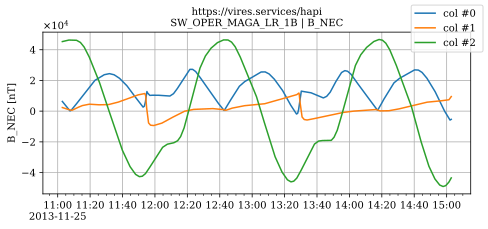

In [ ]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './cachedir'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Method 1.
hapiplot(data, meta);

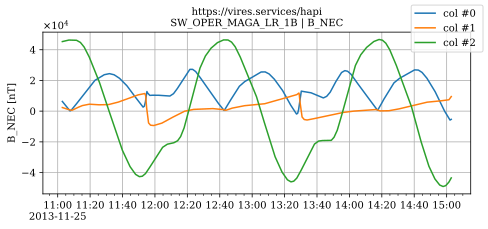

In [ ]:
# Method 2.
data, meta = hapiplot(server, dataset, parameters, start, stop)

## Modify Matplotlib style and labels

List all styles.

In [ ]:
# See also
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import matplotlib
rclib =  matplotlib.style.library
print('Style options available:')
for key in rclib:
    print(key)

Style options available:
ggplot
seaborn-v0_8-pastel
seaborn-v0_8-deep
bmh
fast
seaborn-v0_8-talk
classic
seaborn-v0_8-dark-palette
seaborn-v0_8-poster
seaborn-v0_8-paper
_classic_test_patch
seaborn-v0_8-bright
grayscale
seaborn-v0_8-darkgrid
seaborn-v0_8-whitegrid
fivethirtyeight
_mpl-gallery-nogrid
seaborn-v0_8-dark
_mpl-gallery
Solarize_Light2
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8
dark_background
tableau-colorblind10
seaborn-v0_8-ticks
seaborn-v0_8-colorblind
seaborn-v0_8-white


## Timeseries

The metadata provided by the VirES HAPI server does not include labels for the components of the parameter `B_NEC`, so the defaults of `col #0`, etc. were used by `hapiplot()`. Here we modify the labels by setting them as options (`tsopts`) that are passed through to the back-end `timeseries` plotting function.

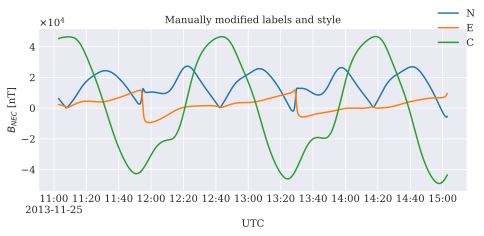

In [ ]:
# Basic default options
popts = {
            'logging': False,
            'cachedir': './hapicache',
            'style': 'seaborn-v0_8-dark',

            'title': 'Manually modified labels and style',
            'xlabel': 'UTC',
            'ylabel': '$B_{NEC}$ [nT]',
        
            'tsopts': {'legendlabels': ['N','E','C']}
}

hapiplot(data, meta, **popts);

## Pass Matplotlib `rcParams` to `hapiplot`

List all rcParams

In [ ]:
# import matplotlib as mpl
# mpl.rcParams

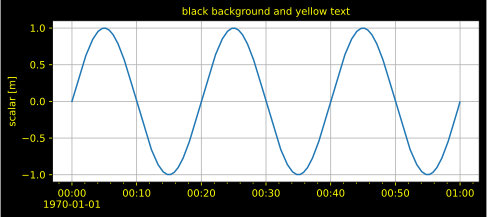

In [ ]:
server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:59:59Z'
parameters = 'scalar'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

popts = {
            'usecache': True,
            'useimagecache': False,
            'logging': False,
            'saveimage': True,
            'returnimage': False,
            'title': 'black background and yellow text',
            'rcParams': {
                'savefig.transparent': False,
                'figure.facecolor': 'black',
                'savefig.facecolor': 'black',
                'font.family': 'DejaVu Sans',
                'text.color': 'yellow',
                'xtick.color': 'yellow',
                'ytick.color': 'yellow',
                'axes.labelcolor': 'yellow'
            }
         }

hapiplot(data, meta, **popts);

## Matplotlib

The standard package for plotting in Python is Matplotlib. The plotting features of this package are low-level, meaning that a significant amount of configuration is needed to create a presentable plot.

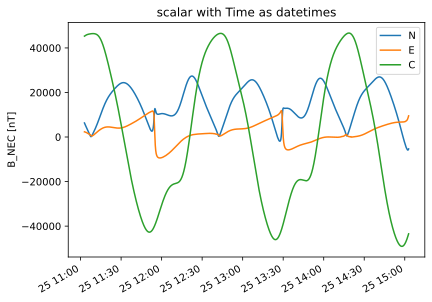

In [ ]:
from hapiclient import hapi

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'usecache': True, 'logging': False, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime

time_name = meta['parameters'][0]['name']
parameter1_name = meta['parameters'][1]['name']
# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data[time_name]), data[parameter1_name][:, 0], label='N')
plt.plot(hapitime2datetime(data[time_name]), data[parameter1_name][:, 1], label='E')
plt.plot(hapitime2datetime(data[time_name]), data[parameter1_name][:, 2], label='C')
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')
plt.ylabel(f"{meta['parameters'][1]['name']} [{meta['parameters'][1]['units']}]")
plt.legend()
plt.show()

## Pandas

We can convert the HAPI `ndarray` to a Pandas DataFrame and then use the `plot` method of a DataFrame.

In [ ]:
data

array([(b'2013-11-25T11:02:52.000Z', [  6308.4702,   2347.2374,  45294.5919]),
       (b'2013-11-25T11:02:53.000Z', [  6282.7241,   2343.9951,  45301.5368]),
       (b'2013-11-25T11:02:54.000Z', [  6258.5256,   2341.2154,  45309.4043]),
       ...,
       (b'2013-11-25T15:02:49.000Z', [ -5417.4704,   9405.5133, -43536.3982]),
       (b'2013-11-25T15:02:50.000Z', [ -5380.5175,   9451.4363, -43500.9831]),
       (b'2013-11-25T15:02:51.000Z', [ -5341.7958,   9498.7136, -43465.3516])],
      dtype=[('Timestamp', 'S24'), ('B_NEC', '<f8', (3,))])

,N,E,C
Time,,,
2013-11-25 11:02:52+00:00,6308.4702,2347.2374,45294.5919
2013-11-25 11:02:53+00:00,6282.7241,2343.9951,45301.5368
2013-11-25 11:02:54+00:00,6258.5256,2341.2154,45309.4043
2013-11-25 11:02:55+00:00,6234.5447,2338.2230,45317.2562
2013-11-25 11:02:56+00:00,6210.6752,2335.2058,45325.0857
...,...,...,...
2013-11-25 15:02:47+00:00,-5485.1844,9317.1860,-43606.5889
2013-11-25 15:02:48+00:00,-5452.3575,9359.7662,-43571.7942
2013-11-25 15:02:49+00:00,-5417.4704,9405.5133,-43536.3982


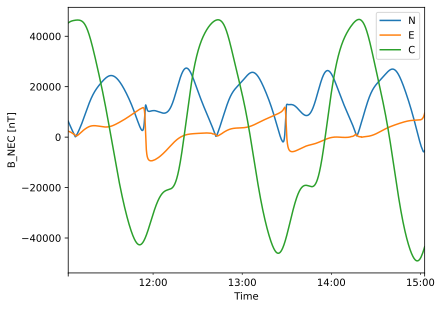

In [ ]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'usecache': True, 'logging': False, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

import pandas

time_name = meta['parameters'][0]['name']
parameter1_name = meta['parameters'][1]['name']

# Create DataFrame
df = pandas.DataFrame(data[parameter1_name])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data[time_name])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['N', 'E', 'C']

display(df)

%matplotlib inline
p = df.plot(ylabel=f"{meta['parameters'][1]['name']} [{meta['parameters'][1]['units']}]");